# Pembuka 

Bismillahirrahmanirrahim

Assalamu'alaikum warahmatullahi wabarakatuh

Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan Hidayah-Nya kepada kita semua. Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan pertama Program Training **Algoritma Machine Learning** Kelas Mahir. 

Pada pertemuan ini kamu akan belajar

1.   K Means Clustering
2.   Algoritma K Means Clustering
3.   Contoh K Means Clustering
4.   Fungsi K Means Clustering
5.   K Means dengan Scikit Learn

# K Means Clustering

K-Means (MacQueen, 1967) adalah salah satu algortima pembelajaran tanpa pengawasan paling sederhana yang memecahkan masalah pengelompokkan yang terkenal. Prosedurnya mengikuti cara sederhana dan mudah untuk mengklasifikasikan kumpulan data yang diberikan melalui sejumlah cluster tertentu (asumsikan k cluster) teteap secara apriori. Ide utamanya adalah mendefinisikan k centroid, satu untuk setiap cluster. Centroid ini harus ditempatkan dengan cara yang licik karena lokasi yang berbeda menyababkan hasil yang berbeda. Jadi, pilihan yang lebih baik adalah menempatkan mereka sejauh mungkin dari satu sala lain. Langkah selanjutnya adalah mengambil setiap titil milik kumpulan data yang diberikan dan mengaitkannya ke centroid terdekat. Ketika tidak ada poin yang tertunda, langkah pertama selesai dan pengelompojan awal dilakukan dari langkah sebelumnya. Setelah kita memiliki k centroid bari ini, peningkatan baru harus dilakukan antara ririk set data yang sama dan centroid baru terdekat. Sebuah loop telah dibuat. Sebagai hasil dari loop ini kita dapat melihat bahwa k centroid mengubah lokasina langkah demi langkah sampai tidak ada lagi perubahan yang dilakukan. Dengan kata lain centroid tidak bergerak lagi. Terakhir, algoritma ini bertujuan untuk meminimalkan fungsi tujuan, dalam hal ini fungsi kesalahan kuadrat. Fungsi tujuan

$$ J=\sum^k_{j=1}\sum^k_{i=1}||x_i^{(j)}-c_j||^2 $$

dimana $ ||x_i^{(j)}-c_j||^2 $ adalah ukuran jarak yang dipilih antara titik data $ x_i^{(j)} $ dan pusat cluster $c_j$ merupakan indikator jarak n titik data dari masing-masing pusat cluster

## Algoritma K-Means Clustering

1.   Tentukan parameter k
2.   Tentukan pusat cluster awal secara acak
3.   Hitung jarak setiap data ke pusat cluster
4.   Tetapkan cluster data berdasarkan pusat cluster terdekat
5.   Memperbarui pusat cluster dengan menghitung nilai rata-rata setiap cluster
6.   Ulangi langkah 3-5 sampai kriteria terpenuhi:
     * Jumlah iterasi tertentu tercapau, atau
     * Tidak ada (atau minimal) perbedaan anggota cluster pada dua itersi terakhir, atau
     * Tidak ada (atau minimum) perbedaan pusat cluster atau
     * Selisih SSE (Sum of Squared Error) minimum

## Contoh Implementasi K Means

**0. DataSet**


|$$x_1$$|$$x_2$$|
|-------|-------|
|$$1$$|$$1$$|
|$$2$$|$$3$$|
|$$7$$|$$8$$|
|$$8$$|$$8$$|


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data = pd.DataFrame({"x1": [1,2,7,8], "x2": [1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


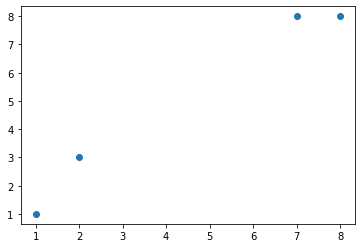

In [110]:
plt.scatter(data.x1, data.x2)

**1.  Tentukan parameternya k**

$$ k=2 $$

In [111]:
k=2

**2.  Tentukan pusat cluster awal secara acak**

|**Centroid**|$$x_1$$|$$x_2$$|
|-------|-------|-------|
|$$c_1$$|$$1$$|$$1$$|
|$$c_2$$|$$2$$|$$3$$|

In [112]:
pusat_klaster = np.array([[1,1],[2,3]])
pusat_klaster

array([[1, 1],
       [2, 3]])

In [113]:
# Menentukan pusat klaster awal
import random
def pusat_klaster_awal(k,data):
    X=np.array(data)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster = X[pusat_klaster_index]
    return pusat_klaster

**3.  Menghiutng jarak setiap data ke pusat cluster**

In [114]:
# Mendefinisikan fungsi jarak_euclidean
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

In [115]:
def jarak_centroid_euclidean(data,pusat_klaster):
    n=len(data)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(data.iloc[i,::])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return jarak

In [116]:
jarak_centroid=jarak_centroid_euclidean(data,pusat_klaster)
jarak_centroid

[[0.0, 2.23606797749979],
 [2.23606797749979, 0.0],
 [9.219544457292887, 7.0710678118654755],
 [9.899494936611665, 7.810249675906654]]

**4.  Tetepkan klaster data berdasarkan pusat klaster terdekat**

In [117]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
    return label_klaster

In [118]:
klaster=menentukan_klaster(jarak_centroid)
klaster

[0, 1, 1, 1]

**5.  Memperbarui pusat klaster dengan menghitung nilai rata-rata setiap cluster**

In [119]:
def menghitung_pusat_klaster(data, klaster):
    data['label']=klaster
    pusat_barudf=data.groupby('label', as_index=False).mean()
    pusat_barudf=pusat_barudf.iloc[::,1:]
    pusat_klaster_baru=np.array(pusat_barudf)
    return pusat_klaster_baru

In [120]:
pusat_klaster_baru=menghitung_pusat_klaster(data, klaster)
pusat_klaster_baru

array([[1.        , 1.        ],
       [5.66666667, 6.33333333]])

**6.  Ulangi langkah 2-5 hingga kriteria henti dipenuhi**

In [121]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

In [122]:
perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru)

4.955356249106169

## Fungsi K Means Clustering

In [123]:
def plot_klaster(X, klaster, pusat_klaster):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=klaster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(pusat_klaster[:, 0], pusat_klaster[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [124]:
def k_means(k, df):
    X=np.array(df)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(df,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        plot_klaster(X, klaster, pusat_klaster_lama)
        pusat_klaster_baru = menghitung_pusat_klaster(df, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

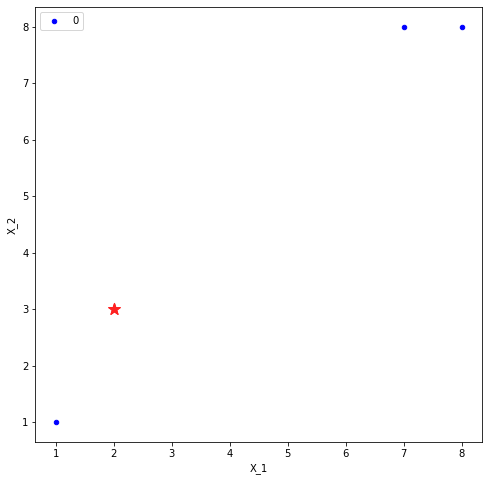

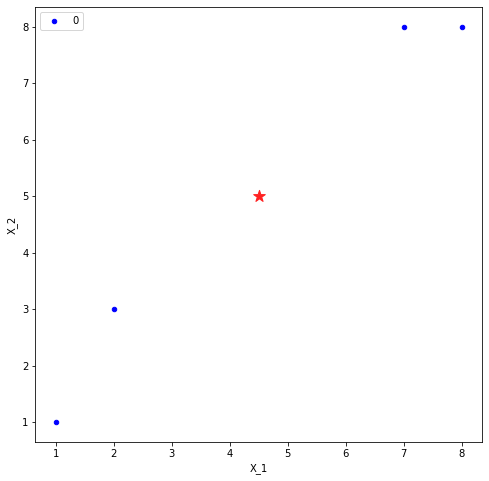

In [125]:
iterasi, klaster, pusat_klaster = k_means(2,data)

In [126]:
pusat_klaster

array([[4.5, 5. ]])

## K-Means Clustering menggunakan Python Scikit Learn

In [127]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

data = pd.DataFrame({"x1": [1,2,7,8], "x2": [1,3,8,8]})

X = np.array(data)
X

array([[1, 1],
       [2, 3],
       [7, 8],
       [8, 8]], dtype=int64)

In [128]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 1, 1])

In [129]:
kmeans.predict([[0,0], [12,3]])

array([0, 1])

In [130]:
kmeans.cluster_centers_

array([[1.5, 2. ],
       [7.5, 8. ]])

# Latihan

Diberikan datset sebagai berikut

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Super-Store-Dataset.csv')
data.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164


In [132]:
data_used=data[["sales", "quantity", "profit"]]
data_used

,sales,quantity,profit
0,261.9600,2,41.9136
1,731.9400,3,219.5820
2,14.6200,2,6.8714
3,957.5775,5,-383.0310
4,22.3680,2,2.5164
...,...,...,...
9983,25.2480,3,4.1028
9984,91.9600,2,15.6332
9985,258.5760,2,19.3932
9986,29.6000,4,13.3200


**Untuk mengetahui jumlah k terbaik dalam Klaster K-Means akan digunakan Metode Elbow** 

In [133]:
from sklearn.cluster import KMeans

In [134]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_used)
    distortions.append(kmeanModel.inertia_)

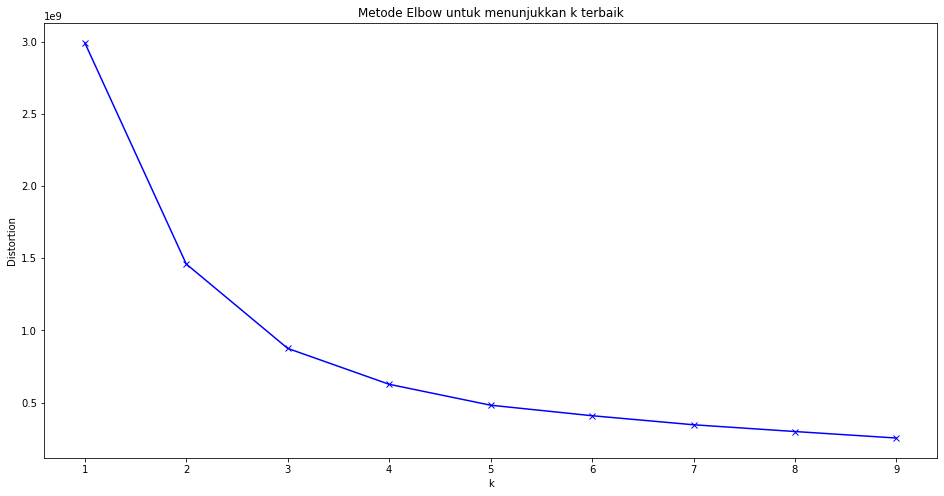

In [135]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Metode Elbow untuk menunjukkan k terbaik')
plt.show()

Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Kesimpulan dari elbow tersebut menunjukkan bahwa 4 merupakan jumlah klaster terbaik.

In [151]:
def k_means(k, df):
    X=np.array(df)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(df,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        pusat_klaster_baru = menghitung_pusat_klaster(df, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

In [152]:
iterasi, klaster, pusat_klaster = k_means(4, data_used)

<ipython-input-119-151b3d05ddf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=klaster


In [153]:
data_used_stlhklaster = data_used
data_used_stlhklaster

,sales,quantity,profit,label
0,261.9600,2,41.9136,1
1,731.9400,3,219.5820,2
2,14.6200,2,6.8714,1
3,957.5775,5,-383.0310,2
4,22.3680,2,2.5164,1
...,...,...,...,...
9983,25.2480,3,4.1028,1
9984,91.9600,2,15.6332,1
9985,258.5760,2,19.3932,1
9986,29.6000,4,13.3200,1


In [154]:
data_used_stlhklaster.to_csv('klasterisasi_data_retail.csv', index=False)

In [155]:
data_used_stlhklaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sales     9988 non-null   float64
 1   quantity  9988 non-null   int64  
 2   profit    9988 non-null   float64
 3   label     9988 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 312.2 KB
